# ANN on Iris Dataset Using Tensorflow

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn.metrics import accuracy_score, classification_report 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.shape

(150, 5)

Text(0.5, 1.0, 'sepal width vs length')

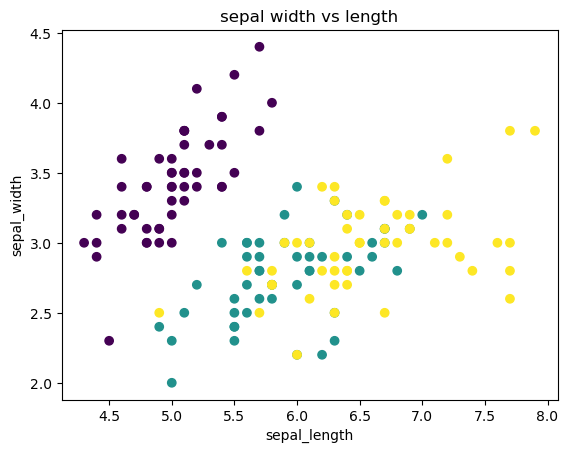

In [29]:
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'], c =  df['target'] )
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal width vs length')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


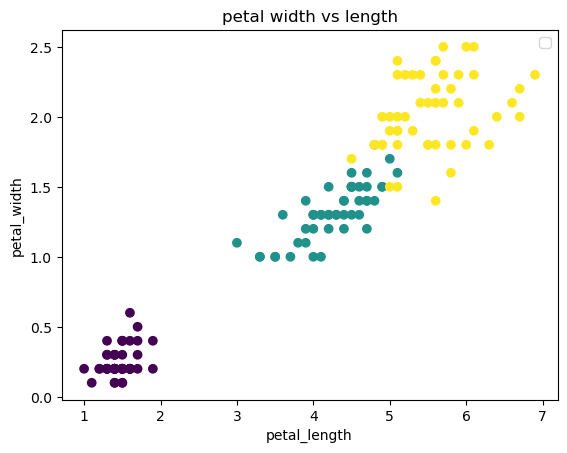

In [34]:
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], c = df['target'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal width vs length')
plt.legend();

In [35]:
X = df.drop(columns = ['target'])
y = tf.keras.utils.to_categorical(df['target'],3) 
# Note : if you schoose not to do categoreical encoding change loss armunel in compile to sparse_categorical_crossentropy
#y = df['target']
print('X shape', X.shape)
print('y shape', y.shape)

X shape (150, 4)
y shape (150, 3)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)
print('X_train shape:', X_train.shape, '   X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape, '   y_test shape:', y_test.shape)

X_train shape: (120, 4)    X_test shape: (30, 4)
y_train shape: (120, 3)    y_test shape: (30, 3)


In [37]:
#model 

model = keras.Sequential([
     keras.layers.Dense(25, input_shape = (4,), activation = 'relu'),
     keras.layers.Dense(15,activation = 'relu'),
     keras.layers.Dense(3, activation = 'softmax')
])

model.compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
4/4 [==============================] - 3s 8ms/step - loss: 1.2989 - accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 1.2287 - accuracy: 0.4833
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1595 - accuracy: 0.5750
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1026 - accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 1.0498 - accuracy: 0.6583
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 1.0051 - accuracy: 0.6583
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9687 - accuracy: 0.6583
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9331 - accuracy: 0.6583
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9036 - accuracy: 0.6583
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.8760 - accuracy: 0.6583
Epoch 11/50
4/4 [===============

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                125       
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 3)                 48        
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pred = pd.DataFrame(model.predict(X_test)) # we get probabilties for each class
y_pred = y_pred.idxmax(axis = 1) # taking the class with max probabilty
y_pred[:5]

1/1 [==============================] - 0s 197ms/step


0    1
1    0
2    2
3    1
4    2
dtype: int64

In [40]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 1s 663ms/step - loss: 0.3903 - accuracy: 0.9333


[0.39027151465415955, 0.9333333373069763]

In [41]:
y_test = pd.DataFrame(y_test).idxmax(axis = 1) # earlier did one hot encoding on y thus reversing tha

In [42]:
accuracy_score(y_test, y_pred)

0.9333333333333333

<AxesSubplot:>

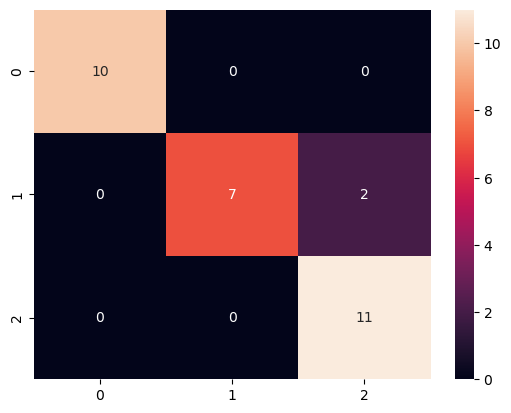

In [43]:
cm = tf.math.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

<AxesSubplot:>

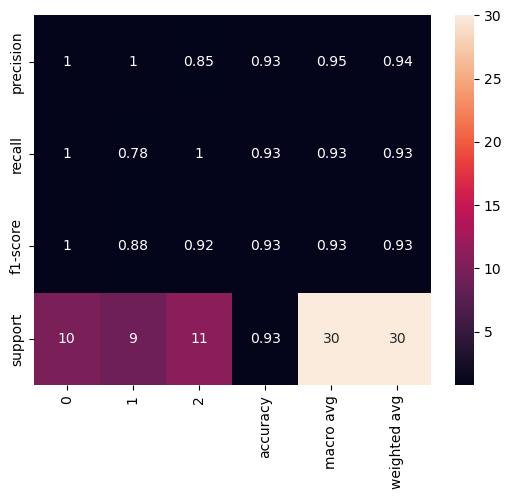

In [44]:
clf = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(clf), annot = True)